In [1]:
import os

import numpy as np
from scipy.io import loadmat
import mne

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mat = loadmat('data/s09.mat')

In [3]:
list(mat)

['__header__', '__version__', '__globals__', 'eeg']

In [4]:
eeg = mat['eeg']
eeg.dtype

dtype([('noise', 'O'), ('rest', 'O'), ('srate', 'O'), ('movement_left', 'O'), ('movement_right', 'O'), ('movement_event', 'O'), ('n_movement_trials', 'O'), ('imagery_left', 'O'), ('imagery_right', 'O'), ('n_imagery_trials', 'O'), ('frame', 'O'), ('imagery_event', 'O'), ('comment', 'O'), ('subject', 'O'), ('bad_trial_indices', 'O'), ('psenloc', 'O'), ('senloc', 'O')])

In [5]:
for name in eeg.dtype.names:
    print(name, eeg[name][0][0].shape)

noise (5, 1)
rest (68, 33920)
srate (1, 1)
movement_left (68, 71680)
movement_right (68, 71680)
movement_event (1, 71680)
n_movement_trials (1, 1)
imagery_left (68, 430080)
imagery_right (68, 430080)
n_imagery_trials (1, 1)
frame (1, 2)
imagery_event (1, 430080)
comment (1,)
subject (1,)
bad_trial_indices (1, 1)
psenloc (64, 3)
senloc (64, 3)


In [6]:
channel_names = [f'EEG{i+1:02d}' for i in range(64)] + [f'EMG{i+65}' for i in range(4)]
channel_types = ['eeg' for _ in range(64)] + ['emg' for _ in range(4)]
srate = eeg['srate'][0,0][0,0]
senloc = eeg['senloc'][0,0]

montage = mne.channels.make_dig_montage({k: v for k, v in zip(channel_names, senloc)})

info = mne.create_info(channel_names, srate, channel_types)

In [69]:
raw = mne.io.RawArray(eeg['movement_left'][0,0], info)
raw.set_montage(montage)

Creating RawArray with float64 data, n_channels=68, n_times=71680
    Range : 0 ... 71679 =      0.000 ...   139.998 secs
Ready.


<ipython-input-69-79361bfd0eee>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage)


<RawArray | 68 x 71680 (140.0 s), ~37.4 MB, data loaded>

Effective window size : 4.000 (s)


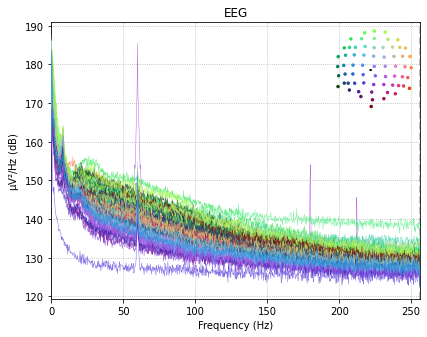

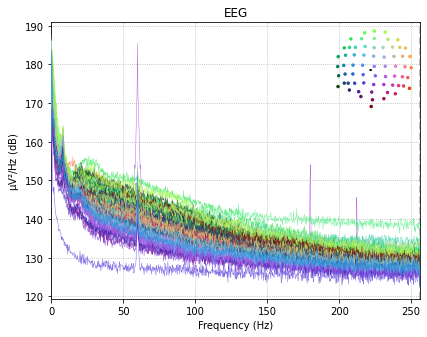

In [70]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = [6.4, 4.8]
raw.plot_psd()

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 64 components
Fitting ICA took 25.2s.


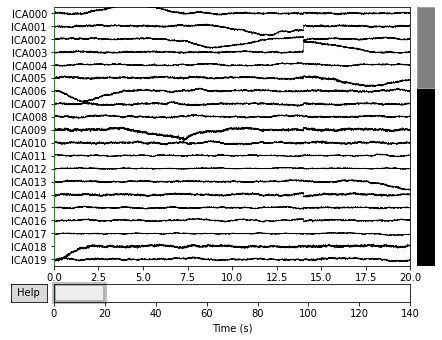

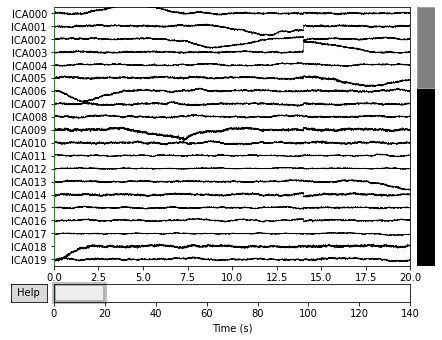

In [71]:
ica = mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)
ica.fit(raw)
# ica.plot_properties(raw)
ica.plot_sources(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 6.2s.


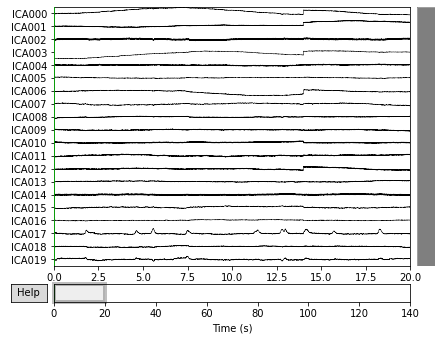

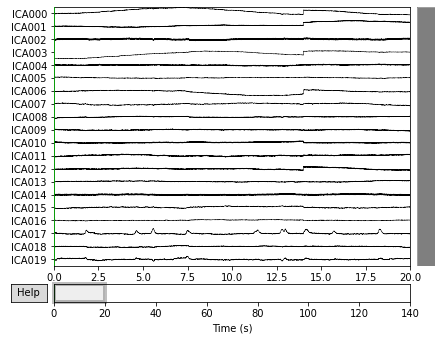

In [72]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
# ica.plot_properties(raw)
ica.plot_sources(raw)